In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [3]:
df_banknote = pd.read_csv('data_coursera.csv')

In [4]:
df_banknote.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


In [5]:
df_banknote.sample(15)

,V1,V2
412,3.77670,9.779400
581,-1.96670,11.805200
1237,-0.88728,2.808000
1262,-1.00500,0.084831
1,4.54590,8.167400
276,4.05200,-0.165550
498,0.57060,-0.024800
733,3.82440,-3.108100
477,3.48930,6.690000
161,3.54990,8.616500


In [6]:
df_banknote_statistical = pd.DataFrame({
    'Mean' : df_banknote[['V1', 'V2']].mean(),
    'STD' : df_banknote[['V1', 'V2']].std(),
    'Min' : df_banknote[['V1', 'V2']].min(),
    '25%' : df_banknote[['V1', 'V2']].quantile(0.25),
    'Median' : df_banknote[['V1', 'V2']].median(),
    '75%' : df_banknote[['V1', 'V2']].quantile(0.75),
    'Max' : df_banknote[['V1', 'V2']].max()
})

df_banknote_statistical

,Mean,STD,Min,25%,Median,75%,Max
V1,0.433735,2.842763,-7.0421,-1.7730,0.49618,2.821475,6.8248
V2,1.922353,5.869047,-13.7731,-1.7082,2.31965,6.814625,12.9516


In [12]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df_banknote[['V1', 'V2']])

df_banknote_scaled = pd.DataFrame(scaled_data, columns=['V1', 'V2'])

df_banknote_scaled.sample(10)

,V1,V2
1300,-0.971746,-0.082540
823,-0.849039,0.222902
1118,-0.834927,-0.059955
1196,-0.861672,0.300848
620,1.065854,-1.085982
1307,-1.081855,-1.080340
1349,-0.710426,-0.695179
543,-0.652925,1.658769
92,1.362786,1.071169
767,-0.955101,-0.379862


C:\Users\syafo\AppData\Local\Temp\ipykernel_14880\1015653295.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_banknote_scaled['V1'], df_banknote_scaled['V2'], alpha=0.25, cmap='viridis')


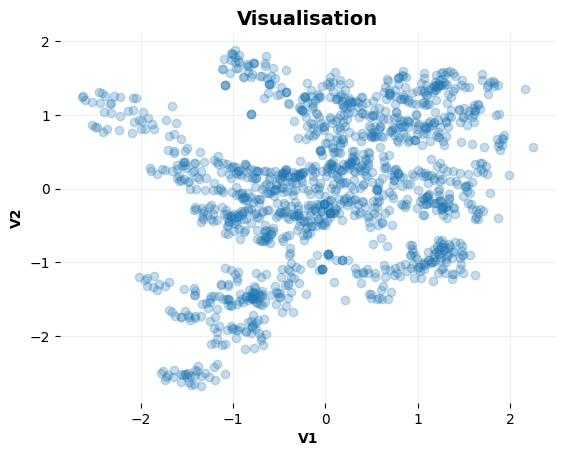

In [8]:
plt.scatter(df_banknote_scaled['V1'], df_banknote_scaled['V2'], alpha=0.25, cmap='viridis')
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Visualisation', fontsize=14, fontweight='semibold')
plt.box(None)
plt.grid(alpha=0.2)
plt.xlabel('V1', fontweight='semibold')
plt.ylabel('V2', fontweight='semibold')
plt.show()


---

### KMeans

In [9]:
kmeans = KMeans(n_clusters=2, random_state=0)
df_banknote_scaled['cluster'] = kmeans.fit_predict(df_banknote_scaled)

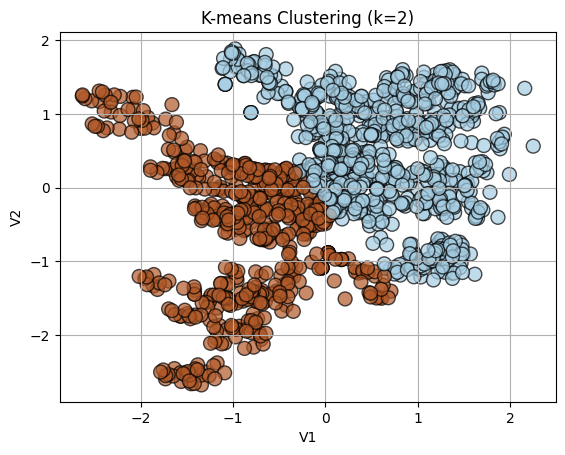

In [10]:
# Plot clusters
plt.scatter(df_banknote_scaled['V1'], df_banknote_scaled['V2'], c=df_banknote_scaled['cluster'], cmap='Paired', s=100, edgecolors='k', alpha=0.7)
plt.title("K-means Clustering (k=2)")
plt.xlabel("V1")
plt.ylabel("V2")
plt.grid(True)
plt.show()


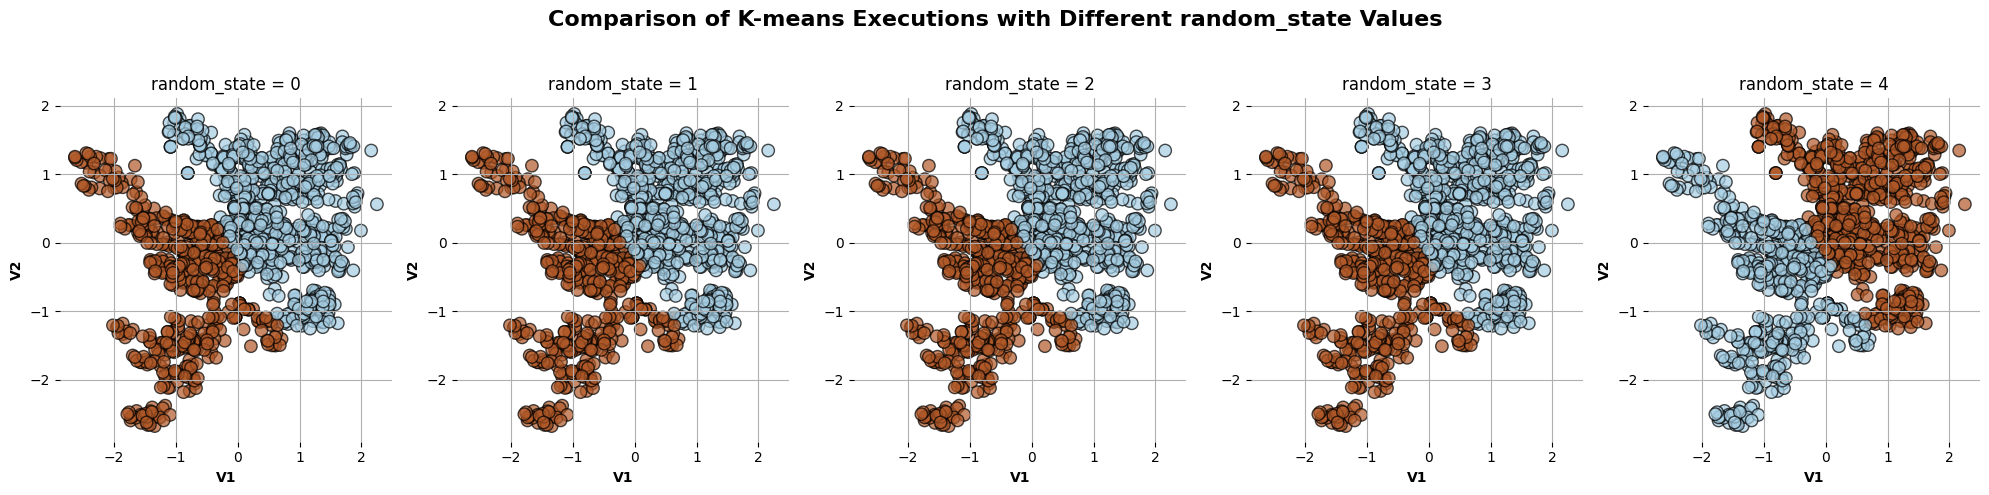

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i, seed in enumerate(range(5)):
    kmeans = KMeans(n_clusters=2, random_state=seed)
    df_banknote_scaled['cluster'] = kmeans.fit_predict(df_banknote_scaled[['V1', 'V2']])
    
    axes[i].scatter(df_banknote_scaled['V1'], df_banknote_scaled['V2'], 
                    c=df_banknote_scaled['cluster'], cmap='Paired', 
                    s=80, edgecolors='k', alpha=0.7)
    axes[i].set_title(f"random_state = {seed}")
    axes[i].set_xlabel("V1", fontweight='semibold')
    axes[i].set_ylabel("V2", fontweight='semibold')
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].grid(True)

plt.suptitle("Comparison of K-means Executions with Different random_state Values", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
